In [5]:
from behavior.behavior import behavior
from behavior.plotScale import plotScale
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
SalSal = ['180710', '180719','180724']
SalCNO = ['180711', '180713', '180720']
CNOSal = ['180712', '180717', '180725']

mouse = 'LR8'
dates = SalSal + SalCNO + CNOSal
runs = [1, 2, 3]

In [11]:
mus = behavior(mouse, dates, runs)
mus.setDir('/Volumes/User Folders/Trent/MixedValenceBehavior')
#mus.setDir('/Users/Amelia/Documents/hakan')
#mus.setDir('C:/Users/hkucukde/Documents/data')

Base directory is set to /Volumes/User Folders/Trent/MixedValenceBehavior



In [15]:
mus.loadData('all', save=True)

Loading data for LR8, run 1 of 180710...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 2 of 180710...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 3 of 180710...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
- - -

Loading data for LR8, run 1 of 180719...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 2 of 180719...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 3 of 180719...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
- - -

Loading data for LR8, run 1 of 180724...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 2 of 180724...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 3 of 180724...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
- - -

Loading data for

NameError: global name 'mus' is not defined

In [25]:
import pickle

openPickle = True
savePickle = False

if savePickle:
    print('Saving locally...')
    with open('/Users/Amelia/Documents/hakan/data/CNO_trials/' + mus.mouse + '.obj', 'wb') as handle:
        pickle.dump(mus.data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('Saved.')

if openPickle:
    with open('/Users/Amelia/Documents/hakan/data/CNO_trials/' + mus.mouse + '.obj', 'rb') as handle:
        mus.data = pickle.load(handle)


In [17]:
mus.loadTrials(save= False)
mus.loadNidaq(clean=True, save= False)
mus.loadRunning(save= False)


In [95]:
def plotSummary(mus):
    codes=mus.codes[dates[0]][1]

    Performance = pd.DataFrame([])

    count = 0
    for date in dates:
        for run in runs:
            for i in [1,2,3,4]:
                perf = mus.getPerformance(date, run).loc[i]
                dictTemp = {'mouse':mus.mouse, 'date':date, 'exp':date, 'run':run, 'condition':perf['conditions'], 'hit':perf['hit'], 'miss':perf['miss']}
                performance = pd.DataFrame(dictTemp, index=[count])
                Performance = pd.concat([Performance, performance])
                count = count + 1

    for date in SalSal:
        Performance['exp'].loc[Performance['date'] == date] = 'Saline-->Saline'
    for date in SalCNO:
        Performance['exp'].loc[Performance['date'] == date] = 'Saline-->CNO'
    for date in CNOSal:
        Performance['exp'].loc[Performance['date'] == date] = 'CNO-->Saline'

    k = 3
    print(codes[k])
    hitSummary=Performance[Performance['condition'] == codes[k]].pivot_table(index=['date', 'exp'], columns= 'run', values='hit')
    #hitSummary

    # Initialize the figure
    f, ax = plt.subplots(1,4, figsize=(20,5))

    for c in [1,2,3,4]:
        sns.stripplot(x='run' ,y='hit', hue='exp', data=Performance[Performance['condition'] == codes[c]], dodge=False, jitter=True, alpha=1., zorder=1, ax=ax[c-1])
        sns.pointplot(x='run' ,y='hit', hue='exp', data=Performance[Performance['condition'] == codes[c]], dodge=False, join=True, markers="d", alpha=0.25, scale=1., ci=None, ax=ax[c-1])
        sns.despine(bottom=True, left=True)
        ax[c-1].set_ylim([0., 1.2])
        ax[c-1].set_title(codes[c])

        handles, labels = ax[c-1].get_legend_handles_labels()
        ax[c-1].legend(handles[3:], labels[3:], title=None,
                  handletextpad=0, columnspacing=1,
                  loc="lower right", ncol=1, frameon=False)
    return ax

Pavlovian_CSm_shock


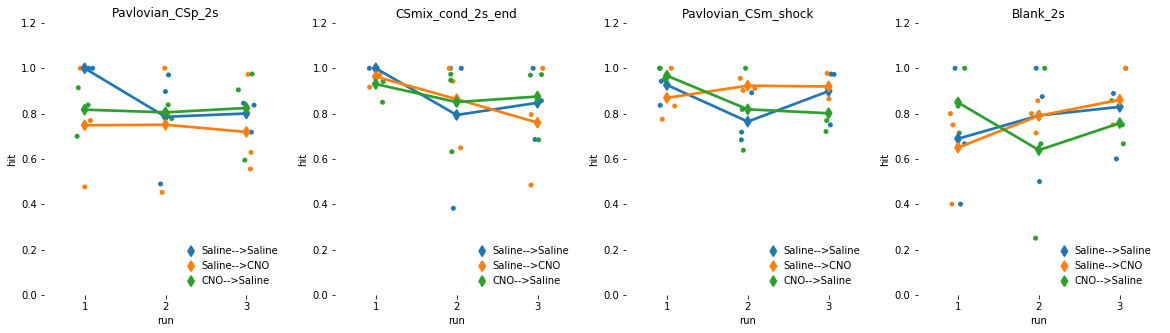

In [96]:
ax=plotSummary(mus)

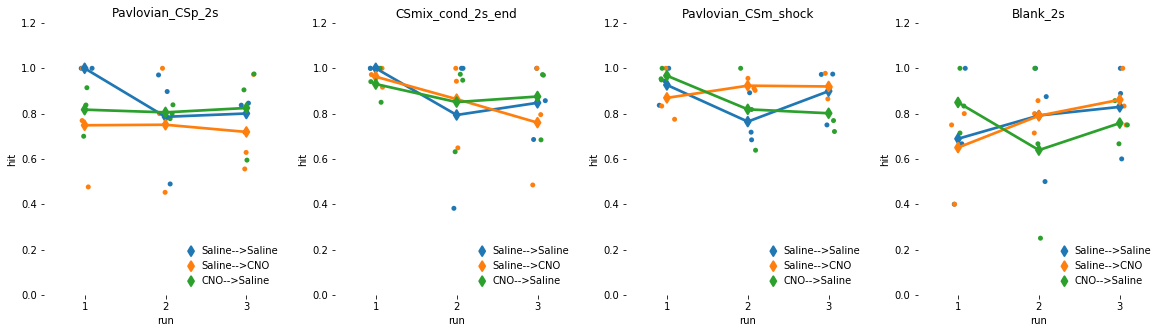

In [94]:

codes=mus.codes[dates[0]][1]

Performance = pd.DataFrame([])

count = 0
for date in dates:
    for run in runs:
        for i in [1,2,3,4]:
            perf = mus.getPerformance(date, run).loc[i]
            dictTemp = {'mouse':mus.mouse, 'date':date, 'exp':date, 'run':run, 'condition':perf['conditions'], 'hit':perf['hit'], 'miss':perf['miss']}
            performance = pd.DataFrame(dictTemp, index=[count])
            Performance = pd.concat([Performance, performance])
            count = count + 1

for date in SalSal:
    Performance['exp'].loc[Performance['date'] == date] = 'Saline-->Saline'
for date in SalCNO:
    Performance['exp'].loc[Performance['date'] == date] = 'Saline-->CNO'
for date in CNOSal:
    Performance['exp'].loc[Performance['date'] == date] = 'CNO-->Saline'

k = 3
hitSummary=Performance[Performance['condition'] == codes[k]].pivot_table(index=['date', 'exp'], columns= 'run', values='hit')
#hitSummary

# Initialize the figure
f, ax = plt.subplots(1,4, figsize=(20,5))

for c in [1,2,3,4]:
    sns.stripplot(x='run' ,y='hit', hue='exp', data=Performance[Performance['condition'] == codes[c]], dodge=False, jitter=True, alpha=1., zorder=1, ax=ax[c-1])
    sns.pointplot(x='run' ,y='hit', hue='exp', data=Performance[Performance['condition'] == codes[c]], dodge=False, join=True, markers="d", alpha=0.25, scale=1., ci=None, ax=ax[c-1])
    sns.despine(bottom=True, left=True)
    ax[c-1].set_ylim([0., 1.2])
    ax[c-1].set_title(codes[c])

    handles, labels = ax[c-1].get_legend_handles_labels()
    ax[c-1].legend(handles[3:], labels[3:], title=None,
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=1, frameon=False)

AttributeError: 'Figure' object has no attribute 'plot'

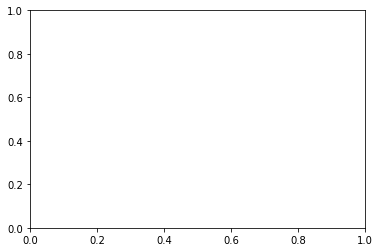

In [28]:
ax, fig = plt.subplots()
ax.plot(hitSummary.loc['exp'] == 'Saline-->Saline')

In [ ]:

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

sns.stripplot(x='run' ,y='hit', hue='exp', data=Performance[Performance['condition'] == codes[1]], dodge=False, jitter=True, alpha=1., zorder=1)
sns.pointplot(x='run' ,y='hit', hue='exp', data=Performance[Performance['condition'] == codes[1]], dodge=False, join=True, markers="d", alpha=0.25, scale=1., ci=None)
plt.ylim([0., 1.])
#hitSummary.loc['Saline-->Saline']

#for run in set(Performance['run']):

In [ ]:

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

colors = ['red','blue','green','grey']
for code in range(1,4):
    sns.stripplot(data=hitSummary.loc[codes[code]], dodge=True, jitter=True, alpha=.25, zorder=code, color= colors[code-1])
    plt.ylim([0, 1])
    sns.legend


In [ ]:
Performance

In [ ]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="run", hue="None",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)
